In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
#creating path
path = 'C:/Users/logan/Downloads/CareerFoundry/NBA Stats'

In [3]:
#connecting data
df = pd.read_csv(os.path.join(path, '02 Data',  'Prepared Data', 'final nba stats set csv position fix.csv'))

In [4]:
df

,player_id,season,player,team_abbreviation,state,age,player_height,player_weight,college,country,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,mvp,position,experience,season_result
0,419,1997,A.C. Green,DAL,Texas,33,205.74,102.05820,Oregon State,United States of America,...,-8.0,0.100,0.207,0.119,0.523,0.045,False,PF,12,No postseason
1,667,1998,A.C. Green,DAL,Texas,34,205.74,102.05820,Oregon State,United States of America,...,-7.2,0.090,0.196,0.118,0.496,0.074,False,PF,13,No postseason
2,1006,1999,A.C. Green,DAL,Texas,35,205.74,102.05820,Oregon State,United States of America,...,-5.6,0.097,0.179,0.148,0.441,0.043,False,PF,14,No postseason
3,9331,2000,A.C. Green,LAL,California,36,205.74,102.05820,Oregon State,United States of America,...,8.1,0.089,0.179,0.111,0.482,0.058,False,PF,15,Champion
4,11196,2001,A.C. Green,MIA,Florida,37,205.74,102.05820,Oregon State,United States of America,...,3.3,0.089,0.171,0.141,0.492,0.050,False,PF,16,Playoffs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,2821,2003,Zydrunas Ilgauskas,CLE,Ohio,28,220.98,117.93392,NaN,Lithuania,...,-7.9,0.108,0.172,0.279,0.516,0.101,False,C,5,No postseason
12840,3068,2004,Zydrunas Ilgauskas,CLE,Ohio,29,220.98,117.93392,NaN,Lithuania,...,-3.7,0.122,0.163,0.229,0.541,0.074,False,C,6,No postseason
12841,3667,2005,Zydrunas Ilgauskas,CLE,Ohio,30,220.98,117.93392,NaN,Lithuania,...,2.5,0.136,0.170,0.243,0.550,0.065,False,C,7,No postseason
12842,11030,2020,Zylan Cheatham,NOP,Louisiana,24,195.58,99.79024,Arizona State,United States of America,...,-23.9,0.062,0.128,0.103,0.667,0.094,False,PF,1,No postseason


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          12844 non-null  int64  
 1   season             12844 non-null  int64  
 2   player             12844 non-null  object 
 3   team_abbreviation  12844 non-null  object 
 4   state              12844 non-null  object 
 5   age                12844 non-null  int64  
 6   player_height      12844 non-null  float64
 7   player_weight      12844 non-null  float64
 8   college            10990 non-null  object 
 9   country            12844 non-null  object 
 10  draft_year         12844 non-null  object 
 11  draft_round        12844 non-null  object 
 12  draft_number       12844 non-null  object 
 13  gp                 12844 non-null  int64  
 14  pts                12844 non-null  float64
 15  reb                12844 non-null  float64
 16  ast                128

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          12844 non-null  int64  
 1   season             12844 non-null  int64  
 2   player             12844 non-null  object 
 3   team_abbreviation  12844 non-null  object 
 4   state              12844 non-null  object 
 5   age                12844 non-null  int64  
 6   player_height      12844 non-null  float64
 7   player_weight      12844 non-null  float64
 8   college            10990 non-null  object 
 9   country            12844 non-null  object 
 10  draft_year         12844 non-null  object 
 11  draft_round        12844 non-null  object 
 12  draft_number       12844 non-null  object 
 13  gp                 12844 non-null  int64  
 14  pts                12844 non-null  float64
 15  reb                12844 non-null  float64
 16  ast                128

In [7]:
sub = df[['season', 'pts']]

In [8]:
sub

,season,pts
0,1997,7.2
1,1998,7.3
2,1999,4.9
3,2000,5.0
4,2001,4.5
...,...,...
12839,2003,17.2
12840,2004,15.3
12841,2005,16.9
12842,2020,3.0


### Since net rating should  be around 0 (e.g. every team that wins by a point, another team loses by a point), I want to see how pts have trended over time

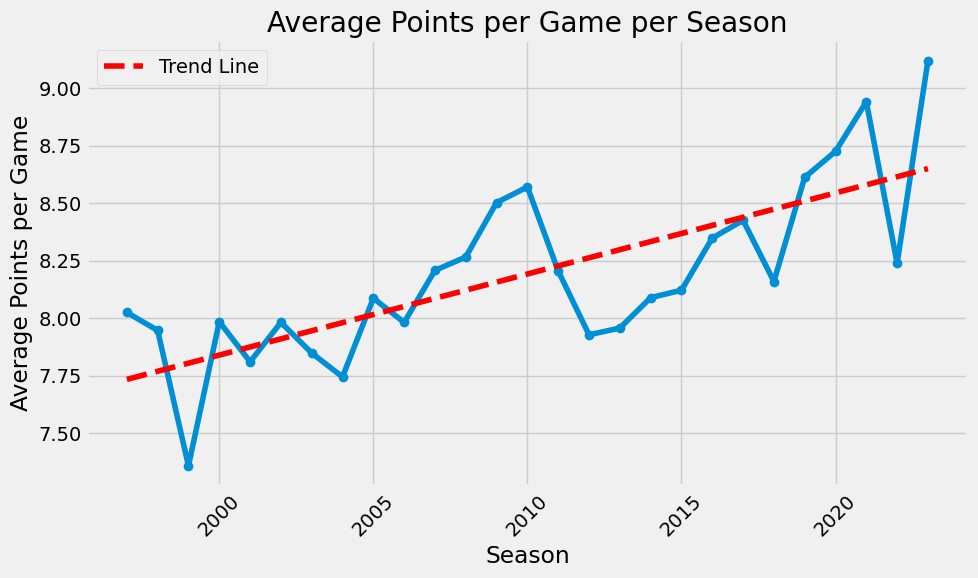

In [9]:
from sklearn.linear_model import LinearRegression
# Calculate the average points per game for each season
average_pts_per_season = sub.groupby('season')['pts'].mean()

# Convert index to numeric values
season_numeric = pd.to_numeric(average_pts_per_season.index)



# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(average_pts_per_season.index, average_pts_per_season.values, marker='o', linestyle='-')
plt.title('Average Points per Game per Season')
plt.xlabel('Season')
plt.ylabel('Average Points per Game')
plt.grid(True)
plt.xticks(rotation=45)

# Fit linear regression model
X = season_numeric.values.reshape(-1, 1)
y = average_pts_per_season.values
model = LinearRegression().fit(X, y)
trend_line = model.predict(X)

# Plotting the trend line
plt.plot(average_pts_per_season.index, trend_line, color='red', linestyle='--', label='Trend Line')

plt.legend()
plt.tight_layout()
plt.show()

In [10]:
# Convert 'season' to datetime with only the year
sub['season'] = pd.to_datetime(sub['season'], format='%Y')



In [11]:
sub

,season,pts
0,1997-01-01,7.2
1,1998-01-01,7.3
2,1999-01-01,4.9
3,2000-01-01,5.0
4,2001-01-01,4.5
...,...,...
12839,2003-01-01,17.2
12840,2004-01-01,15.3
12841,2005-01-01,16.9
12842,2020-01-01,3.0


<Figure size 1200x800 with 0 Axes>

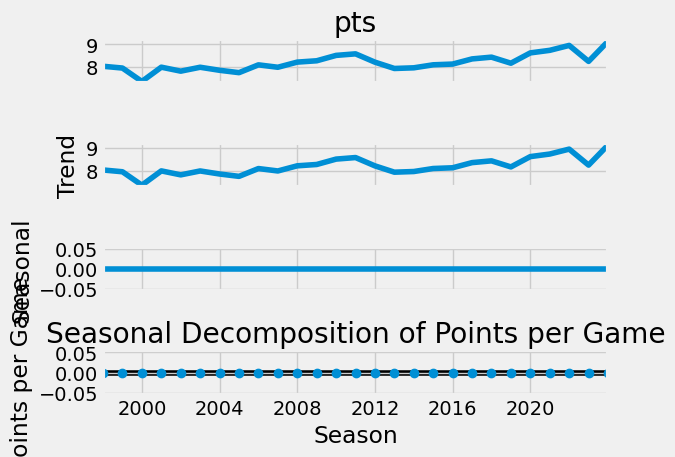

In [12]:
# Convert 'season' to datetime with only the year
sub['season'] = pd.to_datetime(sub['season'], format='%Y')

# Set 'season' as the index
sub.set_index('season', inplace=True)

# Resample the data to ensure a yearly frequency
sub = sub.resample('Y').mean()

# Now, you can safely apply the seasonal_decompose method on the 'pts' column.
decomposition = sm.tsa.seasonal_decompose(sub['pts'], model='additive')

# Plot the decomposition results
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.title('Seasonal Decomposition of Points per Game')
plt.xlabel('Season')
plt.ylabel('Points per Game')
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

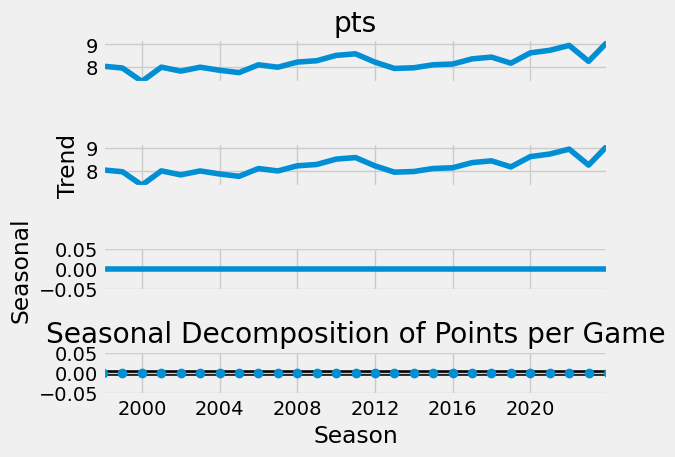

In [13]:
# Plot the decomposition results with adjusted layout
plt.figure(figsize=(12, 10))  # Increase the height of the figure
decomposition.plot()
plt.subplots_adjust(hspace=0.5)  # Increase vertical spacing between subplots
plt.title('Seasonal Decomposition of Points per Game')
plt.xlabel('Season')
plt.ylabel('')  # Set y-axis label to an empty string
plt.tight_layout()
plt.show()


### It appears this is pretty hard to chart with this since there's only 1 data point per year.

In [14]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub['pts'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.870674
p-value                         0.345980
Number of Lags Used             0.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


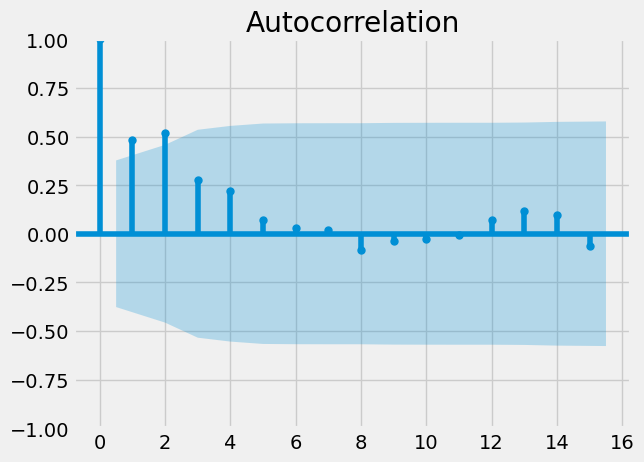

In [15]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(sub)
plt.show()

### The test statistic is above the critical value 5% and the p-value is well above .05, let's try differencing.

In [16]:
data_diff = sub - sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [17]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [18]:
data_diff.head()

,pts
season,
1998-12-31,-0.078469
1999-12-31,-0.589066
2000-12-31,0.627303
2001-12-31,-0.174507
2002-12-31,0.171389


In [19]:
data_diff.columns

Index(['pts'], dtype='object')

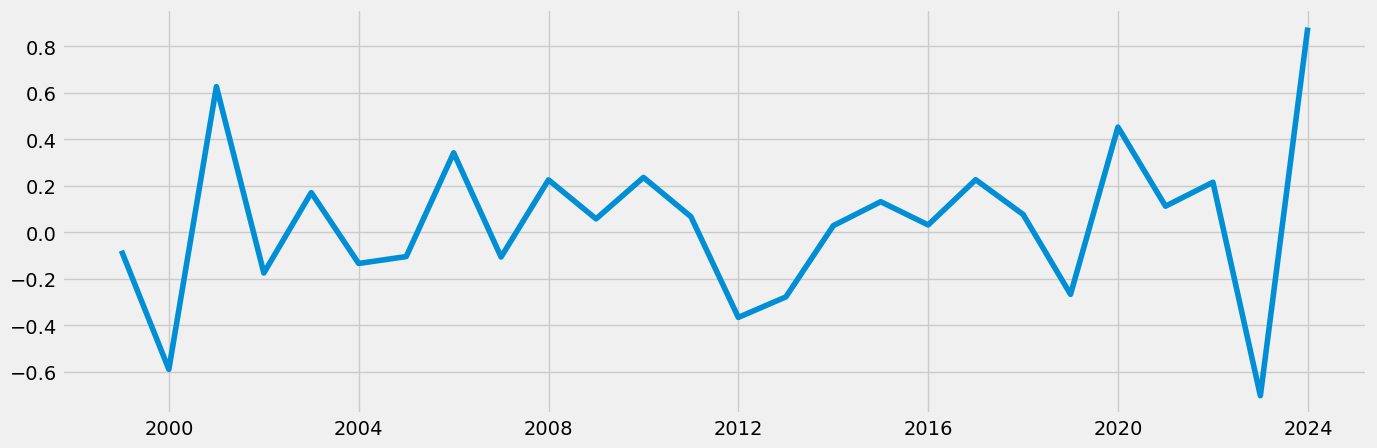

In [20]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [21]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -7.601072e+00
p-value                        2.388527e-11
Number of Lags Used            0.000000e+00
Number of Observations Used    2.500000e+01
Critical Value (1%)           -3.723863e+00
Critical Value (5%)           -2.986489e+00
Critical Value (10%)          -2.632800e+00
dtype: float64


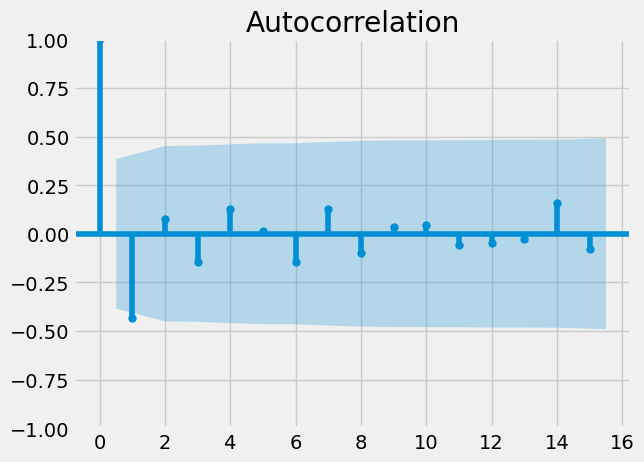

In [22]:
plot_acf(data_diff)
plt.show()

### The test statistic is now smaller than the critical value and the p-value is now well below 0.05 if it's to the -11th power.